In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# uploading datasets
dataset = pd.read_excel('/content/datasets.xls')
print(dataset.shape)

# dataset.info( )

dataset.head()


(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# removing id
X = dataset.iloc[1:,1:-1].values
Y = dataset.iloc[1:,-1].values

# change into int type  from float type
X = X.astype('int64')
Y = Y.astype('int64')

X[0]


array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0])

In [ ]:
# labeling data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])


In [ ]:
# encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:
# spliting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.99,random_state=0) 

# X_train.shape
Y_train.shape

(300,)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(600))

clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=600, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Accuracy on test dataset

from sklearn.metrics import accuracy_score
# accuracy on test data
y_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, Y_test)

acc = test_data_accuracy
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.7667340067340067


In [ ]:
from sklearn.metrics import confusion_matrix  
print("Confuion Matrix: ") 
cf = confusion_matrix(Y_test,y_test_prediction)

Confuion Matrix: 


In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

pre = precision_score(Y_test, y_test_prediction)
rec = recall_score(Y_test, y_test_prediction)
f1 = f1_score(Y_test,y_test_prediction)

In [ ]:
# Result

print("Accuracy of MLP:  ",acc)
print("Precision of MLP: ", pre)
print("Recall  of MLP: ",  rec)
print('F1 score of MLP : ',f1)

Accuracy of MLP:   0.7667340067340067
Precision of MLP:  0.4582435989471165
Recall  of MLP:  0.29107767137862894
F1 score of MLP :  0.3560141290202639


In [ ]:
# confusion matrix

print("Confusion Matrix of Logistic")

print(cf)


Confusion Matrix of Logistic
[[20857  2264]
 [ 4664  1915]]


(Text(32.09375, 0.5, 'True Class'), Text(0.5, 14.09375, 'Predicted Class'))

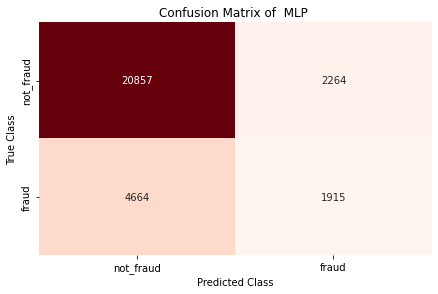

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(Y_test, y_test_prediction)
cm_logit = pd.DataFrame(cf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Reds", fmt = 'g')
plt.title("Confusion Matrix of  MLP "), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")